In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import summary_table
import requests
import re
import json

In [4]:
html = requests.get("https://bitnodes.21.co/dashboard/?days=365").text
m = re.search(r"var nodesSeries=([^;]+);", html, re.MULTILINE)
nodesSeries=json.loads(m.group(1))

In [5]:
ipv4 = pd.Series(nodesSeries[0]["data"])
ipv6 = pd.Series(nodesSeries[1]["data"])
df = pd.DataFrame(pd.Series(range(0, 365)), columns=['x']) + (ipv4 + ipv6).to_frame(name='c')
df = pd.DataFrame({'x': range(0, 365), 'c': ipv4 + ipv6})

In [6]:
x = df['x']
y = df['c']
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

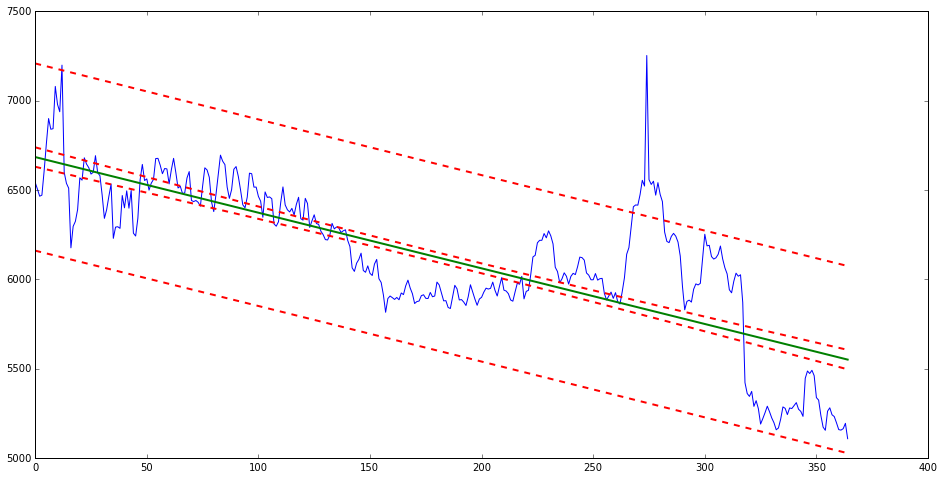

In [7]:
st, data, ss2 = summary_table(model, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

plt.figure(figsize=(16, 8))
plt.plot(x, y, '-')
plt.plot(x, fittedvalues, '-', lw=2)
plt.plot(x, predict_ci_low, 'r--', lw=2)
plt.plot(x, predict_ci_upp, 'r--', lw=2)
plt.plot(x, predict_mean_ci_low, 'r--', lw=2)
plt.plot(x, predict_mean_ci_upp, 'r--', lw=2)
plt.show()


In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     559.9
Date:                Wed, 25 Nov 2015   Prob (F-statistic):           1.51e-75
Time:                        00:46:03   Log-Likelihood:                -2553.7
No. Observations:                 365   AIC:                             5111.
Df Residuals:                     363   BIC:                             5119.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       6684.2636     27.696    241.346      0.000      6629.799  6738.728
x             -3.1161      0.132    -23.661      0.000        -3.375    -2.857
==============================================================================
Omnibus:                       54.980   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.497
Skew:                           0.843   Prob(JB):                     5.53e-23
Kurtosis:                       4.974   Cond. No.                         420.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""